In [63]:
from pathlib import Path
from tqdm.notebook import tqdm
import random
from tabulate import tabulate
from collections import Counter

In [2]:
datapath = Path('../extra/conceptnet-assertions-5.7.0.csv')
assert datapath.exists()

In [8]:
with open(datapath, 'r') as f:
	for i in range(3):
		print(f.readline())

/a/[/r/Antonym/,/c/ab/агыруа/n/,/c/ab/аҧсуа/]	/r/Antonym	/c/ab/агыруа/n	/c/ab/аҧсуа	{"dataset": "/d/wiktionary/en", "license": "cc:by-sa/4.0", "sources": [{"contributor": "/s/resource/wiktionary/en", "process": "/s/process/wikiparsec/2"}], "weight": 1.0}

/a/[/r/Antonym/,/c/adx/thəχ_kwo/a/,/c/adx/ʂap_wə/]	/r/Antonym	/c/adx/thəχ_kwo/a	/c/adx/ʂap_wə	{"dataset": "/d/wiktionary/fr", "license": "cc:by-sa/4.0", "sources": [{"contributor": "/s/resource/wiktionary/fr", "process": "/s/process/wikiparsec/2"}], "weight": 1.0}

/a/[/r/Antonym/,/c/adx/tok_po/a/,/c/adx/ʂa_wə/]	/r/Antonym	/c/adx/tok_po/a	/c/adx/ʂa_wə	{"dataset": "/d/wiktionary/fr", "license": "cc:by-sa/4.0", "sources": [{"contributor": "/s/resource/wiktionary/fr", "process": "/s/process/wikiparsec/2"}], "weight": 1.0}



In [6]:
# with open(datapath, "rbU") as f:
#     num_lines = sum(1 for _ in tqdm(f)) # 34074917

/tmp/ipykernel_8495/4246356908.py:1: DeprecationWarning: 'U' mode is deprecated
  with open(datapath, "rbU") as f:


0it [00:00, ?it/s]

In [10]:
f = open(datapath, 'r')

In [11]:
itr = tqdm(f, total=34074917)

  0%|          | 0/34074917 [00:00<?, ?it/s]

In [46]:
rows = []
with open(datapath, 'r') as f:
	itr = tqdm(f, total=34074917)
	for line in itr:
		terms = line.split('\t')
		if terms[1] == '/r/Causes' and terms[2].startswith('/c/en/') and terms[3].startswith('/c/en/'):
			rows.append([terms[1], terms[2], terms[3], terms[-1].split(' ')[-1][:-2]])
		# if len(rows) > 10:
		# 	break
		# itr.set_description(f'rows={len(rows)}')

  0%|          | 0/34074917 [00:00<?, ?it/s]

In [47]:
len(rows)

16801

In [49]:
rows[-1]

['/r/Causes', '/c/en/zombie', '/c/en/fear', '1.0']

In [75]:
print(tabulate(random.choices(rows, k=10), headers=['relation', 'term1', 'term2', 'weight']))

relation    term1                         term2                                           weight
----------  ----------------------------  --------------------------------------------  --------
/r/Causes   /c/en/setting_cup_on_table    /c/en/picks_up                                       2
/r/Causes   /c/en/starting_flame_or_fire  /c/en/heat_and_light                                 1
/r/Causes   /c/en/playing_sports          /c/en/have_fun_playing_sports                        1
/r/Causes   /c/en/taking_bath             /c/en/get_yourself_clean                             1
/r/Causes   /c/en/sleeping                /c/en/breathing_problems_to_surface                  1
/r/Causes   /c/en/skiing                  /c/en/being_tired                                    1
/r/Causes   /c/en/reading_newspaper       /c/en/being_more_informed_about_world_events         1
/r/Causes   /c/en/going_public            /c/en/embarassment                                   1
/r/Causes   /c/en/climbing    

In [64]:
Counter([row[-1] for row in rows])

Counter({'4.472': 69,
         '1.0': 14562,
         '2.828': 432,
         '2.0': 1355,
         '3.464': 193,
         '7.483': 2,
         '4.0': 90,
         '4.899': 28,
         '6.325': 5,
         '5.657': 15,
         '6.633': 5,
         '9.592': 1,
         '9.381': 1,
         '5.292': 16,
         '8.944': 2,
         '6.0': 12,
         '8.718': 2,
         '6.928': 2,
         '7.746': 4,
         '7.211': 2,
         '8.0': 2,
         '12.961': 1})

In [88]:
vocab = set(word for row in rows for word in row[1:3])
len(vocab)

12832

In [90]:
def filter_line(line):
	terms = line.split('\t')
	if not terms[2].startswith('/c/en/') or not terms[3].startswith('/c/en/'):
		return False
	return True


def process_line(line):
	terms = line.split('\t')
	rel = terms[1]
	t1 = terms[2]
	t2 = terms[3]
	wt = terms[-1].split(' ')[-1][:-2]
	return rel, t1, t2, wt


def select_line(rel, t1, t2, wt):
	# if t1 == '/c/en/setting_cup_on_table':
	# 	return True
	if t1 in vocab and t2 in vocab:
		return True
	return False


selected = []
with open(datapath, 'r') as f:
	itr = tqdm(f, total=34074917)
	for line in itr:
		if not filter_line(line):
			continue
		rel, t1, t2, wt = process_line(line)
		if select_line(rel, t1, t2, wt):
			selected.append([rel, t1, t2, wt])
len(selected)

  0%|          | 0/34074917 [00:00<?, ?it/s]

32513

In [93]:
print(tabulate(random.choices(selected, k=10), headers=['relation', 'term1', 'term2', 'weight']))

relation        term1                                term2                           weight
--------------  -----------------------------------  ----------------------------  --------
/r/UsedFor      /c/en/tickling                       /c/en/showing_affection            1
/r/Causes       /c/en/committing_perjury             /c/en/would_lose_credibility       1
/r/UsedFor      /c/en/tickling                       /c/en/flirting                     2
/r/DerivedFrom  /c/en/playing                        /c/en/play                         1
/r/UsedFor      /c/en/becoming_scuba_diver           /c/en/pleasure                     1
/r/Causes       /c/en/eating_apple                   /c/en/less_hunger                  1
/r/Causes       /c/en/enjoying_company_of_friends    /c/en/very_happy                   1
/r/HasSubevent  /c/en/creating_to_help_other_people  /c/en/make_money                   1
/r/UsedFor      /c/en/eating_dinner                  /c/en/not_being_hungry             1
/r/Rel

In [96]:
set([row[0] for row in selected])

{'/r/Antonym',
 '/r/AtLocation',
 '/r/CapableOf',
 '/r/Causes',
 '/r/CausesDesire',
 '/r/CreatedBy',
 '/r/DefinedAs',
 '/r/DerivedFrom',
 '/r/Desires',
 '/r/DistinctFrom',
 '/r/Entails',
 '/r/EtymologicallyRelatedTo',
 '/r/HasA',
 '/r/HasContext',
 '/r/HasFirstSubevent',
 '/r/HasLastSubevent',
 '/r/HasPrerequisite',
 '/r/HasProperty',
 '/r/HasSubevent',
 '/r/IsA',
 '/r/LocatedNear',
 '/r/MadeOf',
 '/r/MannerOf',
 '/r/MotivatedByGoal',
 '/r/NotCapableOf',
 '/r/NotDesires',
 '/r/NotHasProperty',
 '/r/PartOf',
 '/r/ReceivesAction',
 '/r/RelatedTo',
 '/r/Synonym',
 '/r/UsedFor',
 '/r/dbpedia/genre',
 '/r/dbpedia/occupation'}

In [95]:
print(tabulate([row for row in selected
                if row[0] in {'/r/Antonym'}
                ], headers=['relation', 'term1', 'term2', 'weight']))

relation    term1               term2                  weight
----------  ------------------  -------------------  --------
/r/Antonym  /c/en/accept        /c/en/reject            0.603
/r/Antonym  /c/en/advance       /c/en/late              0.193
/r/Antonym  /c/en/adventure     /c/en/boring            0.153
/r/Antonym  /c/en/affair        /c/en/marriage          0.175
/r/Antonym  /c/en/affair        /c/en/relationship      0.106
/r/Antonym  /c/en/agony         /c/en/bliss             0.128
/r/Antonym  /c/en/agony         /c/en/defeat            0.107
/r/Antonym  /c/en/anger         /c/en/calm              0.134
/r/Antonym  /c/en/anger         /c/en/happiness         0.102
/r/Antonym  /c/en/answer        /c/en/problem           0.271
/r/Antonym  /c/en/answer        /c/en/wrong             0.148
/r/Antonym  /c/en/bad           /c/en/good              1.083
/r/Antonym  /c/en/betrayal      /c/en/trust             0.315
/r/Antonym  /c/en/bill          /c/en/paycheck          0.153
/r/Anton

In [99]:
graph = {}
for row in selected:
	graph.setdefault(row[1], []).append(row)
len(graph)

2351

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

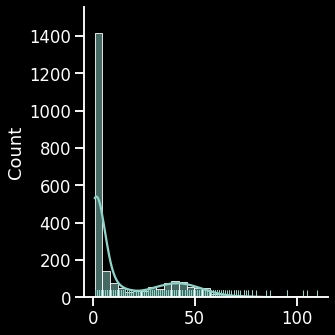

In [117]:
sns.displot([len(v) for k, v in graph.items()], kde=True, rug=True);

In [128]:
def gen_edges(start):
	edges = {}
	for edge in graph[start]:
		edges.setdefault(edge[0], []).append(edge)
	return edges

In [133]:
start = random.choice(list(graph.keys()))

print(start)

print(tabulate([[row[0], row[2], row[3]] for row in graph[start]], headers=['relation', 'term2', 'weight']))


# edges = gen_edges(start)
# options = [[rel, '\n'.join(row[2] for row in rows)] for rel, rows in edges.items()]
# print(tabulate(options, headers=['relation', 'term2']))

/c/en/stopping_standing_in
relation            term2                          weight
------------------  ---------------------------  --------
/r/Causes           /c/en/drip_across_rug               1
/r/Causes           /c/en/foul_odor                     1
/r/Causes           /c/en/gets_dry                      1
/r/Causes           /c/en/getting_hit_by_car            1
/r/Causes           /c/en/getting_out_of                1
/r/Causes           /c/en/jump                          1
/r/Causes           /c/en/jumping_out                   1
/r/Causes           /c/en/laying_in                     1
/r/Causes           /c/en/move_away_from                1
/r/Causes           /c/en/move_out                      1
/r/Causes           /c/en/movement                      1
/r/Causes           /c/en/shoes_to_get_wet              1
/r/Causes           /c/en/stopping_being_wet_by         1
/r/Causes           /c/en/walking_out_of                1
/r/HasPrerequisite  /c/en/moving             

In [136]:
import sys

In [167]:
fuel = 5

links = []

start = random.choice(list(graph.keys()))
current = start
for _ in range(fuel+1):
	if current in graph:
		links.append(random.choice(graph[current]))
		current = links[-1][2]

print(tabulate([[row[1], row[0], row[2], row[3]] for row in links], headers=['term1', 'relation', 'term2', 'weight']))

term1           relation        term2            weight
--------------  --------------  -------------  --------
/c/en/calmness  /r/DerivedFrom  /c/en/calm        1
/c/en/calm      /r/RelatedTo    /c/en/emotion     0.667
/c/en/emotion   /r/RelatedTo    /c/en/sad         0.102
/c/en/sad       /r/HasSubevent  /c/en/cry         2.828
/c/en/cry       /r/RelatedTo    /c/en/display     0.112


In [166]:
graph['/c/en/getting']

[['/r/Causes', '/c/en/getting', '/c/en/aquisition', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/being_happy', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/death', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/disappointment', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/feeling_indebted', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/get', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/gratitude', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/have_new_thing', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/having', '2.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/having_in_hand', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/having_to_take_care_of', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/headaches', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/illness', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/joy', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/let_down', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/losing', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/maki